# 1. Load data

In [2]:
import pandas as pd
import numpy as np

#Source: https://www.kaggle.com/datasets/mahdimashayekhi/social-media-vs-productivity/data

file_id_1 = "1wL27KlL5483mCLZ1v_Fe6bPjdTfoEYPiuK1TlYJnFS8"
sheet_gid_1 = "1294025527"

csv_url_1 = f"https://docs.google.com/spreadsheets/d/{file_id_1}/export?format=csv&gid={sheet_gid_1}"

df = pd.read_csv(csv_url_1)

df.head()

,age,gender,job_type,daily_social_media_time,social_platform_preference,number_of_notifications,work_hours_per_day,perceived_productivity_score,actual_productivity_score,stress_level,sleep_hours,screen_time_before_sleep,breaks_during_work,uses_focus_apps,has_digital_wellbeing_enabled,coffee_consumption_per_day,days_feeling_burnout_per_month,weekly_offline_hours,job_satisfaction_score
0,56,Male,Unemployed,4.180940,Facebook,61,6.753558,8.040464,7.291555,4.0,5.116546,0.419102,8,False,False,4,11,21.927072,6.336688
1,46,Male,Health,3.249603,Twitter,59,9.169296,5.063368,5.165093,7.0,5.103897,0.671519,7,True,True,2,25,0.000000,3.412427
2,32,Male,Finance,NaN,Twitter,57,7.910952,3.861762,3.474053,4.0,8.583222,0.624378,0,True,False,3,17,10.322044,2.474944
3,60,Female,Unemployed,NaN,Facebook,59,6.355027,2.916331,1.774869,6.0,6.052984,1.204540,1,False,False,0,4,23.876616,1.733670
4,25,Male,IT,NaN,Telegram,66,6.214096,8.868753,NaN,7.0,5.405706,1.876254,1,False,True,1,30,10.653519,9.693060


# 2. Cleaning

In [21]:
print(f'The dataset has {df.shape[0]} rows and {df.shape[1]} columns.')
print("Dataset columns: \n", df.columns)
df.info()

The dataset has 30000 rows and 19 columns.
Dataset columns: 
 Index(['age', 'gender', 'job_type', 'daily_social_media_time',
       'social_platform_preference', 'number_of_notifications',
       'work_hours_per_day', 'perceived_productivity_score',
       'actual_productivity_score', 'stress_level', 'sleep_hours',
       'screen_time_before_sleep', 'breaks_during_work', 'uses_focus_apps',
       'has_digital_wellbeing_enabled', 'coffee_consumption_per_day',
       'days_feeling_burnout_per_month', 'weekly_offline_hours',
       'job_satisfaction_score'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   age                             30000 non-null  int64  
 1   gender                          30000 non-null  object 
 2   job_type                        30000 non-null  object 
 3

In [3]:
from sklearn.impute import SimpleImputer

# Kiểm tra giá trị thiếu trong từng cột
missing_values = df.isnull().sum()
print("Missing values per column:\n", missing_values)

# Xử lý các cột số (numeric columns)
# Khởi tạo SimpleImputer với chiến lược mean (thay thế bằng mean)
numeric_columns = df.select_dtypes(include=['float64']).columns
imputer_numeric = SimpleImputer(strategy='mean')

# Áp dụng SimpleImputer vào các cột số
df[numeric_columns] = imputer_numeric.fit_transform(df[numeric_columns])

# Kiểm tra lại giá trị thiếu sau khi xử lý
missing_values_after = df.isnull().sum()
print("\nMissing values after imputation:\n", missing_values_after)

Missing values per column:
 age                                  0
gender                               0
job_type                             0
daily_social_media_time           2765
social_platform_preference           0
number_of_notifications              0
work_hours_per_day                   0
perceived_productivity_score      1614
actual_productivity_score         2365
stress_level                      1904
sleep_hours                       2598
screen_time_before_sleep          2211
breaks_during_work                   0
uses_focus_apps                      0
has_digital_wellbeing_enabled        0
coffee_consumption_per_day           0
days_feeling_burnout_per_month       0
weekly_offline_hours                 0
job_satisfaction_score            2730
dtype: int64

Missing values after imputation:
 age                               0
gender                            0
job_type                          0
daily_social_media_time           0
social_platform_preference        0
num

In [4]:
# Kiểm tra số lượng bản ghi trùng lặp
num_duplicates = df.duplicated().sum()
print(f"Số bản ghi trùng lặp: {num_duplicates}")

# Loại bỏ các bản ghi trùng lặp
df_no_duplicates = df.drop_duplicates()
print(f"Số bản ghi sau khi loại bỏ trùng lặp: {df_no_duplicates.shape[0]}")

Số bản ghi trùng lặp: 0
Số bản ghi sau khi loại bỏ trùng lặp: 30000


In [5]:
# Các cột số cần kiểm tra outlier
numeric_columns = [
    'daily_social_media_time', 'weekly_offline_hours', 'work_hours_per_day',
    'perceived_productivity_score', 'actual_productivity_score',
    'stress_level', 'sleep_hours', 'screen_time_before_sleep',
    'job_satisfaction_score'
]

def check_outliers_iqr(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
    print(f"Column: {col}")
    print(f"  Lower bound: {lower_bound:.3f}")
    print(f"  Upper bound: {upper_bound:.3f}")
    print(f"  Number of outliers: {outliers.shape[0]}")
    print(f"  Percentage of outliers: {100 * outliers.shape[0] / data.shape[0]:.2f}%\n")

# Kiểm tra outlier cho từng cột
for col in numeric_columns:
    check_outliers_iqr(df, col)

Column: daily_social_media_time
  Lower bound: -1.835
  Upper bound: 7.852
  Number of outliers: 348
  Percentage of outliers: 1.16%

Column: weekly_offline_hours
  Lower bound: -11.597
  Upper bound: 31.439
  Number of outliers: 116
  Percentage of outliers: 0.39%

Column: work_hours_per_day
  Lower bound: 1.577
  Upper bound: 12.421
  Number of outliers: 97
  Percentage of outliers: 0.32%

Column: perceived_productivity_score
  Lower bound: -1.106
  Upper bound: 12.132
  Number of outliers: 0
  Percentage of outliers: 0.00%

Column: actual_productivity_score
  Lower bound: -0.821
  Upper bound: 10.727
  Number of outliers: 0
  Percentage of outliers: 0.00%

Column: stress_level
  Lower bound: -4.500
  Upper bound: 15.500
  Number of outliers: 0
  Percentage of outliers: 0.00%

Column: sleep_hours
  Lower bound: 2.899
  Upper bound: 10.099
  Number of outliers: 0
  Percentage of outliers: 0.00%

Column: screen_time_before_sleep
  Lower bound: -0.730
  Upper bound: 2.735
  Number of ou

In [35]:
# Định nghĩa ngưỡng hợp lý cho work_hours_per_day
lower_bound = 0
upper_bound = 20

# Lọc các bản ghi có giá trị không hợp lý
invalid_work_hours = df[(df['work_hours_per_day'] < lower_bound) | (df['work_hours_per_day'] > upper_bound)]
print(f"Số bản ghi có 'work_hours_per_day' không hợp lý: {invalid_work_hours.shape[0]}")

Số bản ghi có 'work_hours_per_day' không hợp lý: 0


In [36]:
# Định nghĩa ngưỡng hợp lý cho daily_social_media_time (giờ/ngày)
lower_bound = 0
upper_bound = 16

# Lọc các bản ghi có giá trị không hợp lý
invalid_social_time = df[(df['daily_social_media_time'] < lower_bound) | (df['daily_social_media_time'] > upper_bound)]
print(f"Số bản ghi có 'daily_social_media_time' không hợp lý (h): {invalid_social_time.shape[0]}")

invalid_social_time_top10 = df[df['daily_social_media_time'] > upper_bound].nlargest(10, 'daily_social_media_time')
print("------")
print("10 bản ghi có giá trị daily_social_media_time lớn nhất không hợp lý:")
print(invalid_social_time_top10[['daily_social_media_time', 'age', 'job_type', 'actual_productivity_score']])

Số bản ghi có 'daily_social_media_time' không hợp lý (h): 47
------
10 bản ghi có giá trị daily_social_media_time lớn nhất không hợp lý:
       daily_social_media_time  age    job_type  actual_productivity_score
8556                 17.973256   58  Unemployed                   5.228518
27710                17.938700   44  Unemployed                   4.951805
1260                 17.864318   18     Student                   5.250440
797                  17.817948   65          IT                   3.964795
20346                17.754817   46   Education                   3.465319
13863                17.750286   65     Student                   3.231980
5595                 17.732636   52     Finance                   4.031387
29997                17.724981   42   Education                   8.658912
10957                17.677759   62   Education                   6.549273
22833                17.674234   22     Finance                   5.720147


In [37]:
# Định nghĩa ngưỡng hợp lý cho weekly_offline_hours (giờ/tuần): (tối đa 24h * 2 ngày)
lower_bound = 0
upper_bound = 48

# Lọc các bản ghi có giá trị không hợp lý
invalid_offline_hours = df[(df['weekly_offline_hours'] < lower_bound) | (df['weekly_offline_hours'] > upper_bound)]
print(f"Số bản ghi có 'weekly_offline_hours' không hợp lý: {invalid_offline_hours.shape[0]}")

Số bản ghi có 'weekly_offline_hours' không hợp lý: 0


In [38]:
# Định nghĩa ngưỡng hợp lý cho screen_time_before_sleep (giờ): mốc 2 giờ rước thời điểm đi ngủ thực tế
lower_bound = 0
upper_bound = 5

# Lọc các bản ghi có giá trị không hợp lý
invalid_screen_time = df[(df['screen_time_before_sleep'] < lower_bound) | (df['screen_time_before_sleep'] > upper_bound)]
print(f"Số bản ghi có 'screen_time_before_sleep' không hợp lý: {invalid_screen_time.shape[0]}")

Số bản ghi có 'screen_time_before_sleep' không hợp lý: 0


**Nhận xét sau khi kiểm tra các trường outlier:**
- outlier: 'daily_social_media_time' (giá trị > 16 giờ/ngày)
Số bản ghi bất hợp lý không nhiều (47 / 30k), chiếm khoảng 0.16% tổng dữ liệu, tức rất nhỏ.
- Các giá trị này đều chỉ vượt ngưỡng tối đa 16 giờ chút ít (từ ~16.8 đến gần 18 giờ).
- User với thời gian dùng mạng xã hội từ 16-18 giờ/ngày là rất cực đoan, gần như liên tục sử dụng.

▶ Giữ lại các giá trị này vì muốn mô hình học được cả các trường hợp cực đoan (người dùng nghiện mạng xã hội nặng).



# 3. EDA

In [39]:
df.describe()

,age,daily_social_media_time,number_of_notifications,work_hours_per_day,perceived_productivity_score,actual_productivity_score,stress_level,sleep_hours,screen_time_before_sleep,breaks_during_work,coffee_consumption_per_day,days_feeling_burnout_per_month,weekly_offline_hours,job_satisfaction_score
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,41.486867,3.113418,59.958767,6.990792,5.510488,4.951805,5.514059,6.500247,1.025568,4.992200,1.999300,15.557067,10.360655,4.964901
std,13.835221,1.976884,7.723772,1.997736,1.968285,1.807615,2.773891,1.399175,0.628817,3.173737,1.410047,9.252956,7.280415,2.022374
min,18.000000,0.000000,30.000000,0.000000,2.000252,0.296812,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,1.797748,55.000000,5.643771,3.858604,3.509336,3.000000,5.598942,0.569569,2.000000,1.000000,8.000000,4.541872,3.528486
50%,41.000000,3.113418,60.000000,6.990641,5.510488,4.951805,5.514059,6.500247,1.025568,5.000000,2.000000,16.000000,10.013677,4.964901
75%,53.000000,4.219533,65.000000,8.354725,7.168062,6.396285,8.000000,7.398974,1.435798,8.000000,3.000000,24.000000,15.300809,6.407090
max,65.000000,17.973256,90.000000,12.000000,8.999376,9.846258,10.000000,10.000000,3.000000,10.000000,10.000000,31.000000,40.964769,10.000000


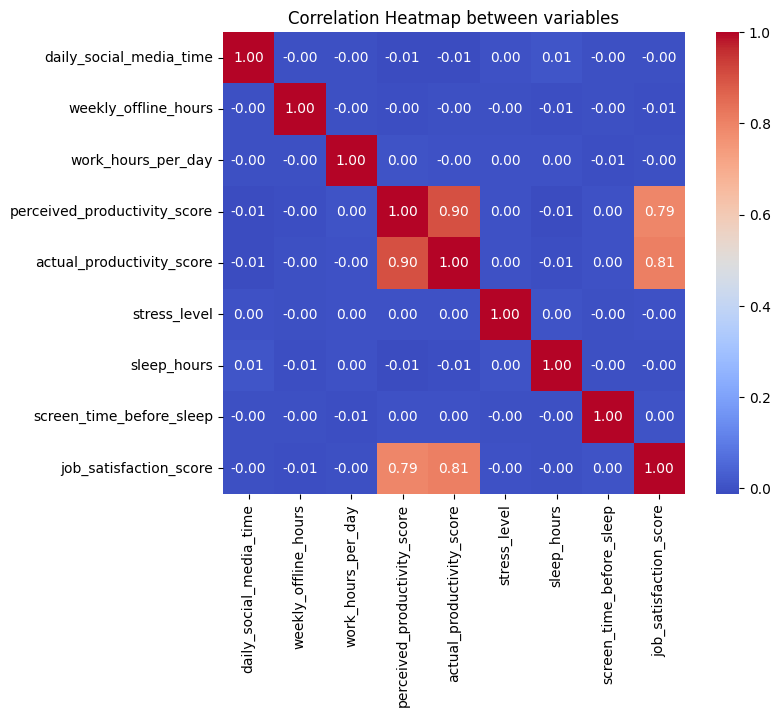

------


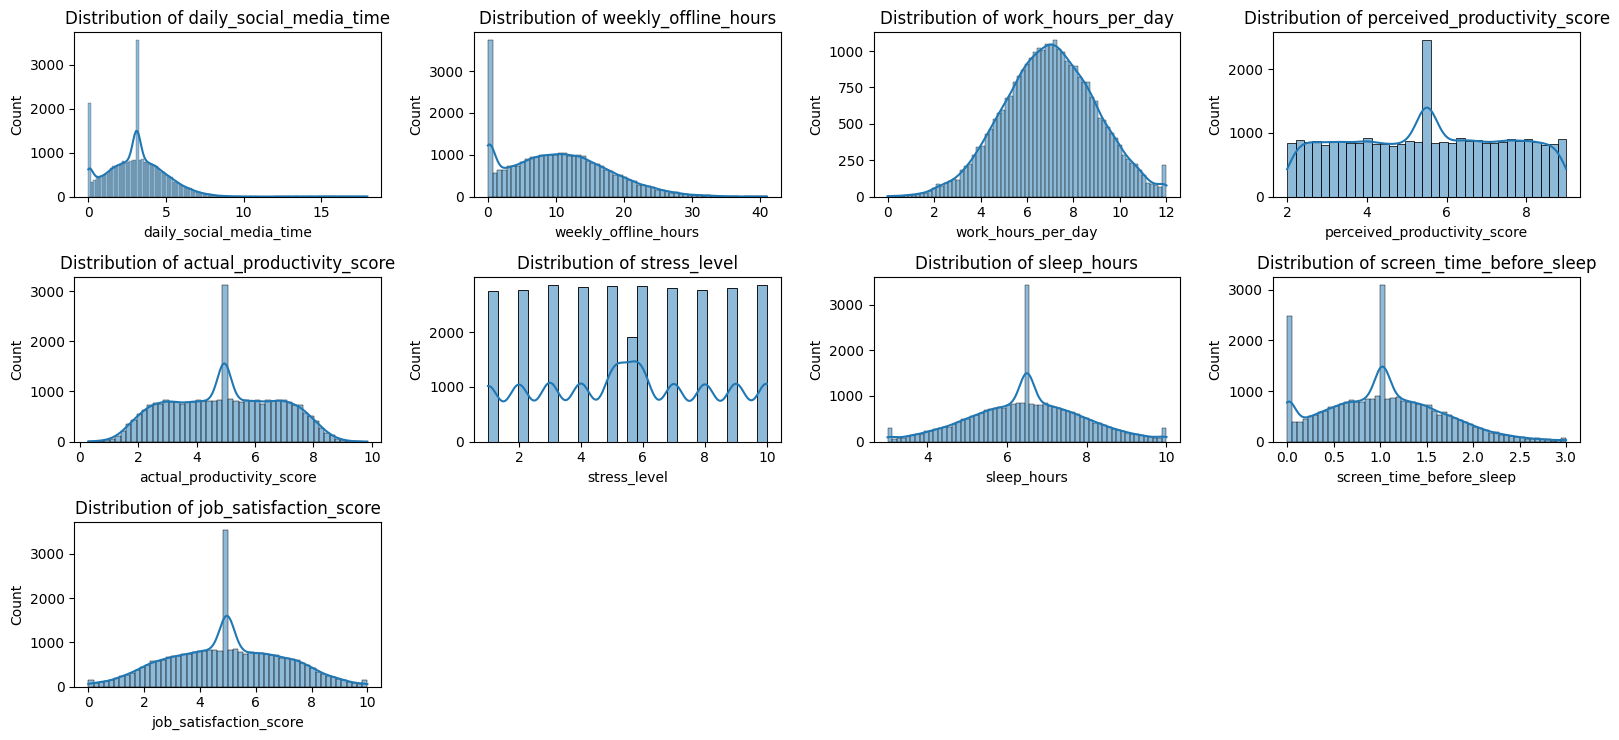

------


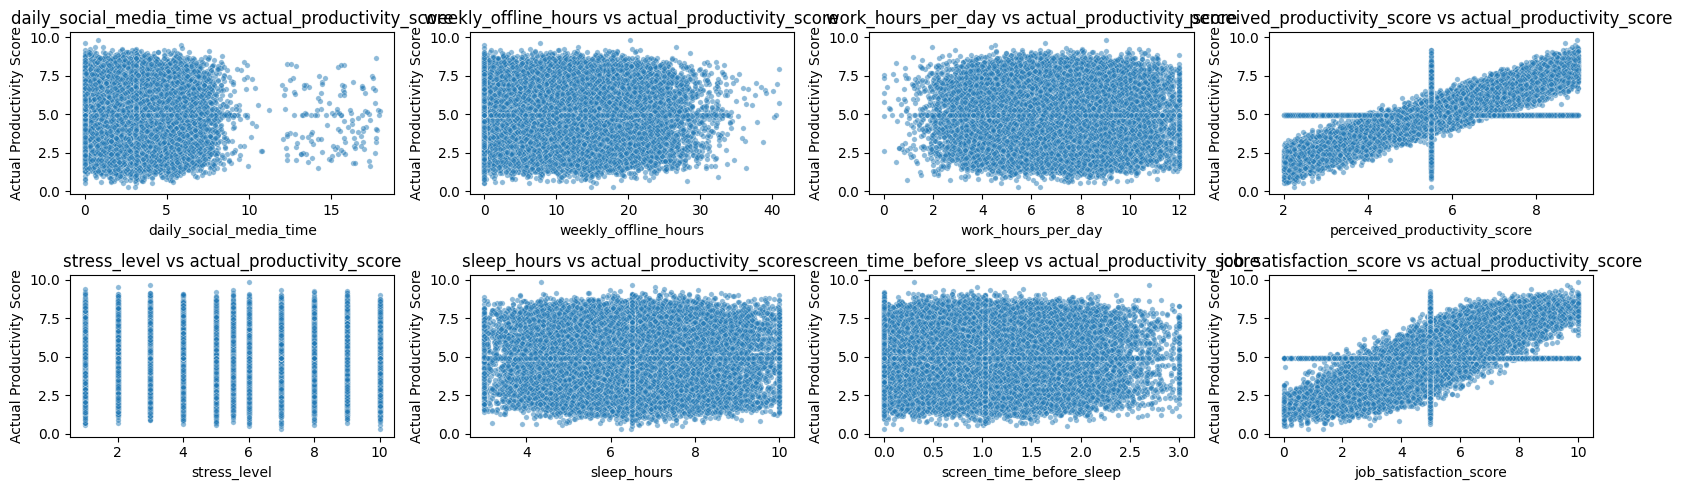

------


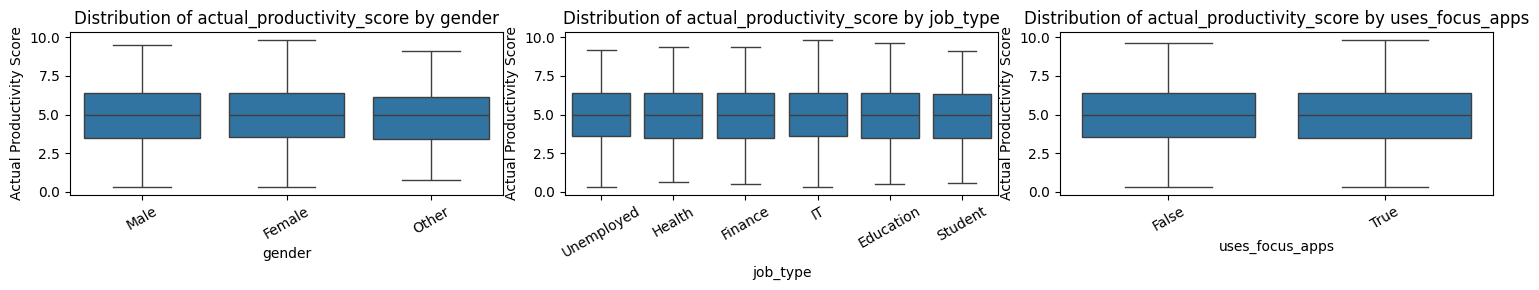

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm

# 1. Correlation heatmap - mối quan hệ giữa các biến số (chỉ chọn biến số)
numeric_cols = [
    'daily_social_media_time', 'weekly_offline_hours', 'work_hours_per_day',
    'perceived_productivity_score', 'actual_productivity_score',
    'stress_level', 'sleep_hours', 'screen_time_before_sleep',
    'job_satisfaction_score'
]

plt.figure(figsize=(8,6))
corr = df[numeric_cols].corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title("Correlation Heatmap between variables")
plt.show()

print("------")

# 2. Phân phối dữ liệu các biến số quan trọng
n_cols = 4  # Số biểu đồ mỗi hàng (có thể chỉnh lại theo ý)
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols*4, n_rows*2.5))

for i, col in enumerate(numeric_cols):
    r = i // n_cols
    c = i % n_cols
    ax = axes[r, c] if n_rows > 1 else axes[c]
    sns.histplot(df[col], kde=True, ax=ax)
    ax.set_title(f'Distribution of {col}')
    ax.set_xlabel(col)
    ax.set_ylabel("Count")

# Ẩn các subplot trống nếu có
for j in range(len(numeric_cols), n_rows * n_cols):
    r = j // n_cols
    c = j % n_cols
    fig.delaxes(axes[r, c])

plt.tight_layout()
plt.show()

print("------")

# 3. Scatter plots biến số với actual_productivity_score
scatter_cols = [col for col in numeric_cols if col != 'actual_productivity_score']
n_cols = 4  # Số plot mỗi hàng
n_rows = (len(scatter_cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols*4, n_rows*2.5))

for i, col in enumerate(scatter_cols):
    r = i // n_cols
    c = i % n_cols
    ax = axes[r, c] if n_rows > 1 else axes[c]
    sns.scatterplot(x=df[col], y=df['actual_productivity_score'], ax=ax, alpha=0.5, s=15)
    ax.set_title(f'{col} vs actual_productivity_score')
    ax.set_xlabel(col)
    ax.set_ylabel('Actual Productivity Score')

# Ẩn các subplot thừa nếu có
for j in range(len(scatter_cols), n_rows * n_cols):
    r = j // n_cols
    c = j % n_cols
    fig.delaxes(axes[r, c])

plt.tight_layout()
plt.show()

print("------")

# 4. Đánh giá ảnh hưởng biến phân loại tới actual_productivity_score
n_cols = 3  # Số plot trên mỗi hàng (tùy số biến và độ rộng màn hình)
n_rows = (len(categorical_cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols*5, n_rows*3))

for i, col in enumerate(categorical_cols):
    r = i // n_cols
    c = i % n_cols
    ax = axes[r, c] if n_rows > 1 else axes[c]
    sns.boxplot(x=col, y='actual_productivity_score', data=df, ax=ax)
    ax.set_title(f'Distribution of actual_productivity_score by {col}')
    ax.set_xlabel(col)
    ax.set_ylabel("Actual Productivity Score")
    ax.tick_params(axis='x', rotation=30)

# Ẩn các subplot trống nếu số biến lẻ
for j in range(len(categorical_cols), n_rows * n_cols):
    r = j // n_cols
    c = j % n_cols
    fig.delaxes(axes[r, c])

plt.tight_layout()
plt.show()


1. Mối quan hệ giữa các biến số (Correlation Heatmap)

  Perceived Productivity Score và Actual Productivity Score có tương quan rất mạnh (r=0.90), cho thấy cảm nhận chủ quan về năng suất gần như phản ánh chính xác năng suất thực tế.

  Job Satisfaction Score cũng tương quan khá mạnh với cả Actual Productivity Score (r=0.81) và Perceived Productivity Score (r=0.79), nghĩa là mức độ hài lòng với công việc là một chỉ báo quan trọng về năng suất.

  Các biến như daily_social_media_time, weekly_offline_hours, work_hours_per_day, stress_level, sleep_hours, screen_time_before_sleep hầu như không có tương quan đáng kể với productivity (|r| < 0.05).

2. Phân phối dữ liệu các biến số chính (Histogram)

  Daily Social Media Time: Phân phối lệch phải, phần lớn mọi người dùng ít hơn 5h/ngày, chỉ số ít dùng nhiều (>10h/ngày là ngoại lệ).

  Weekly Offline Hours: Lệch phải rõ rệt, đa số dưới 10-20h/tuần, một số rất ít có thời gian offline cao.

  Work Hours Per Day: Phân phối gần chuẩn, tập trung chủ yếu ở mức 6-8h/ngày.

  (Perceived/Actual) Productivity Score: Phân phối gần chuẩn, tập trung nhiều ở khoảng trung bình (~5-6 điểm), có một số outlier ở hai đầu thang điểm.

  Stress Level: Phân phối đều từ 1 đến 10, không có nhóm nào vượt trội.

  Sleep Hours: Đa số tập trung ở 6-8h/ngày, lệch nhẹ về phía ít ngủ hơn.

  Screen Time Before Sleep: Đa số dưới 1.5h, số dùng >2h trước khi ngủ là ít.

  Job Satisfaction Score: Phân phối khá chuẩn, đa số ở mức trung bình và cao.

3. Scatter Plot: Mối quan hệ các biến số với actual_productivity_score

  Perceived Productivity Score và Job Satisfaction Score có xu hướng tuyến tính rõ ràng với actual_productivity_score.

  - Điểm càng cao, productivity thực tế càng cao.

  Các biến còn lại (Social Media, Offline Hours, Work Hours, Stress, Sleep, Screen Time) gần như không thấy xu hướng rõ rệt (các điểm phân bố rất rải rác, không có pattern tuyến tính).

4. Boxplot/Bar Chart theo nhóm phân loại

  Gender, Job Type, Uses Focus Apps: Không có sự khác biệt đáng kể về actual_productivity_score giữa các nhóm (đường trung vị gần như nhau, các whisker gần bằng nhau).

  Các nhóm hành vi (social_media_group, sleep_group, stress_group, notification_group, work_hours_group, weekly_offline_group):

  Trung bình actual_productivity_score giữa các nhóm chênh lệch rất nhỏ, không có nhóm nào vượt trội nổi bật.

  Đặc biệt: Perceived Group và Job Satisfaction Group cho thấy sự phân tách rất rõ ràng về productivity — nhóm càng cao, productivity càng cao (và ngược lại), xác nhận các nhận định ở phần tương quan.

5. Nhận định tổng quan EDA

  Yếu tố chủ quan (perceived productivity, job satisfaction) là các biến dự báo mạnh nhất cho actual productivity.

  Các yếu tố hành vi khách quan như social media time, work hours, sleep, stress level... không tạo ra sự khác biệt đáng kể về productivity trong tập dữ liệu này.

  Không có bằng chứng cho thấy việc sử dụng app focus hay digital wellbeing, hoặc khác biệt giới tính/ngành nghề, ảnh hưởng đáng kể đến năng suất thực tế.

  Tập trung các chương trình cải thiện hào hứng công việc, nhận thức bản thân về hiệu suất sẽ tạo tác động mạnh hơn so với chỉ kiểm soát hành vi bên ngoài.

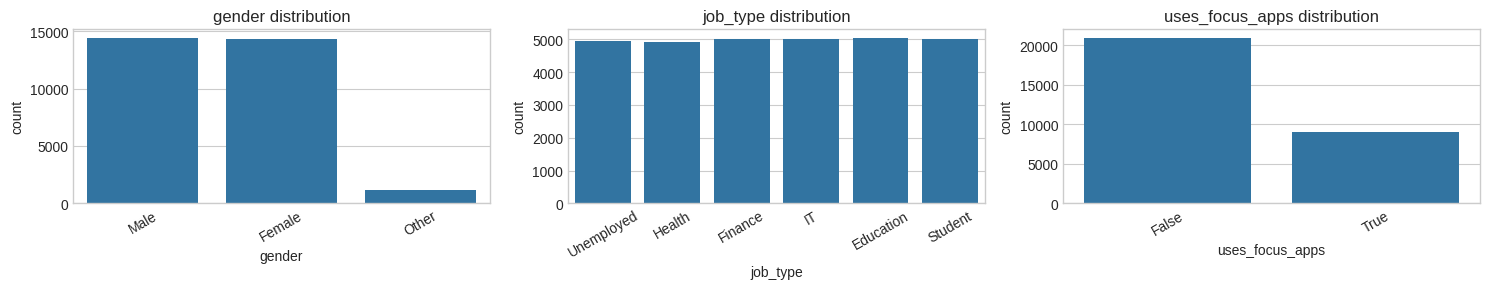

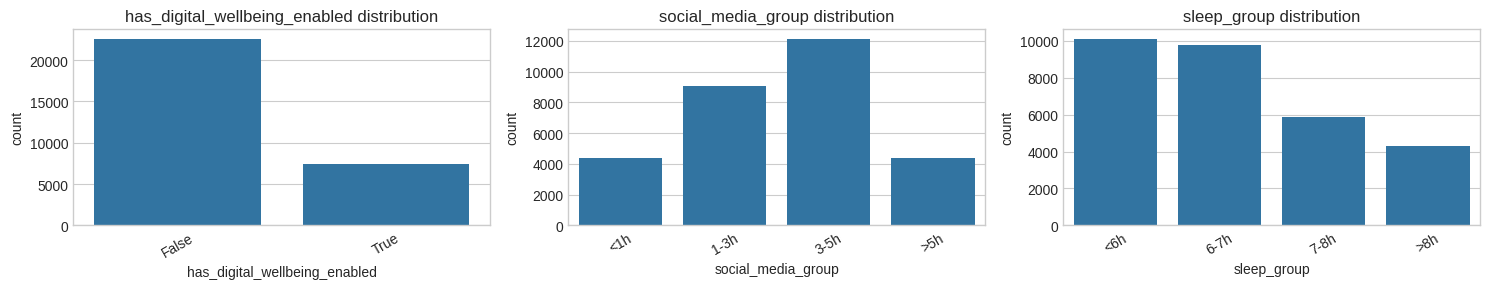

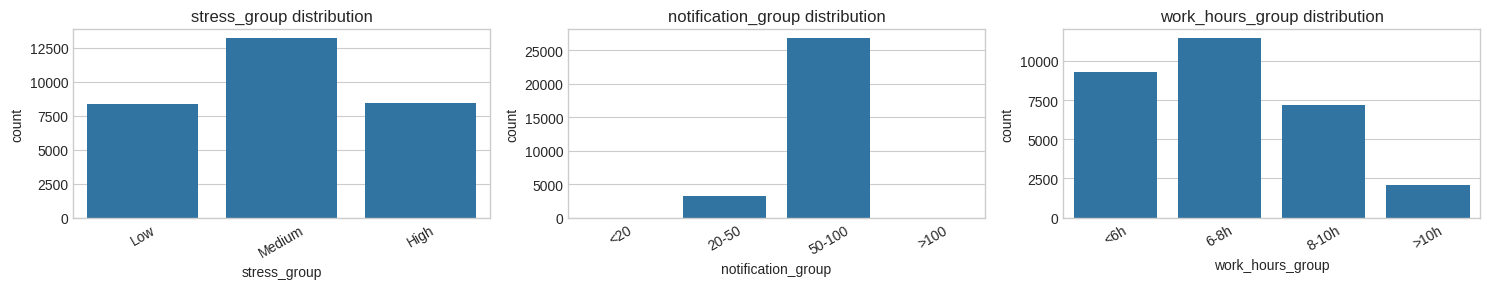

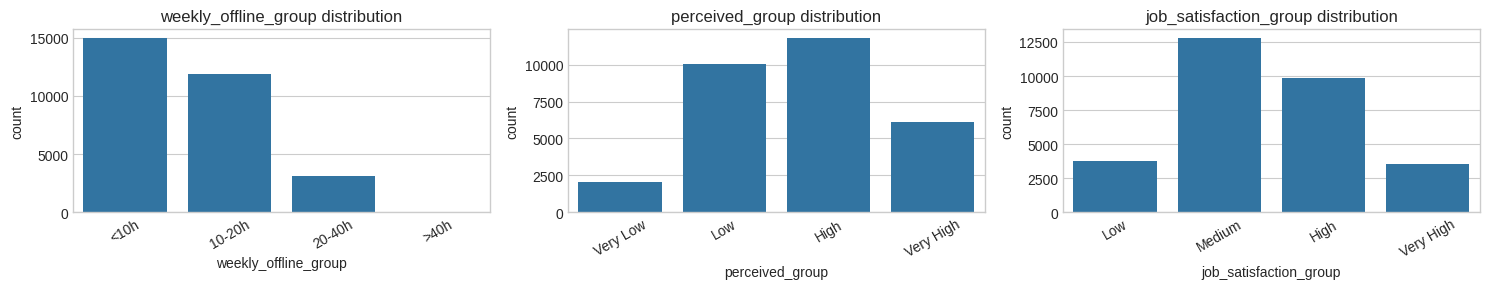

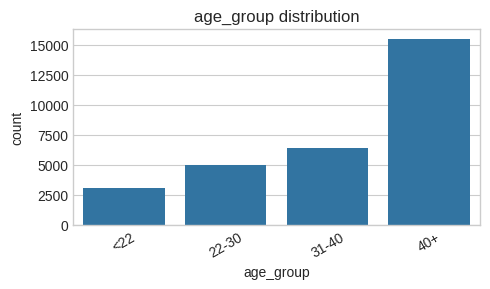

------


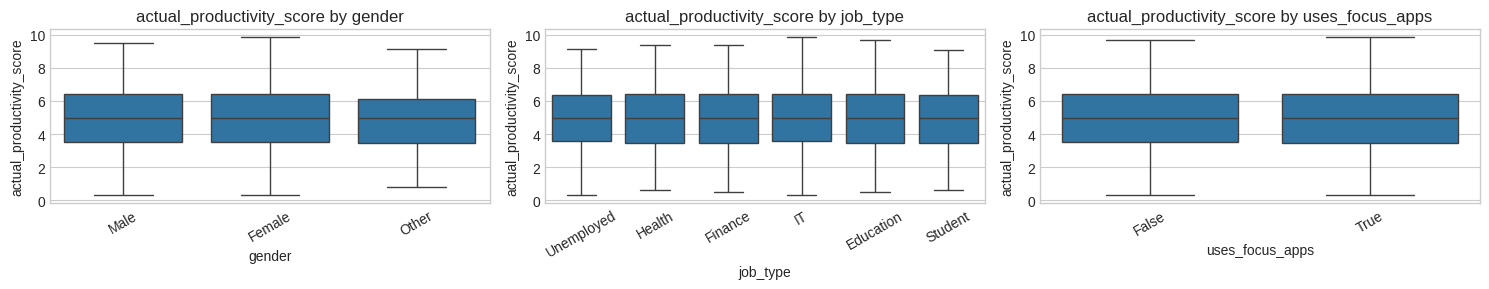

------


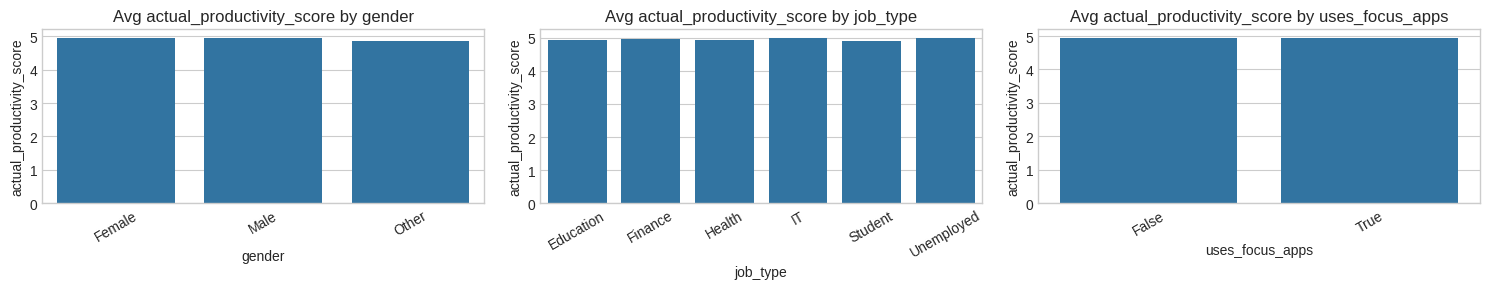

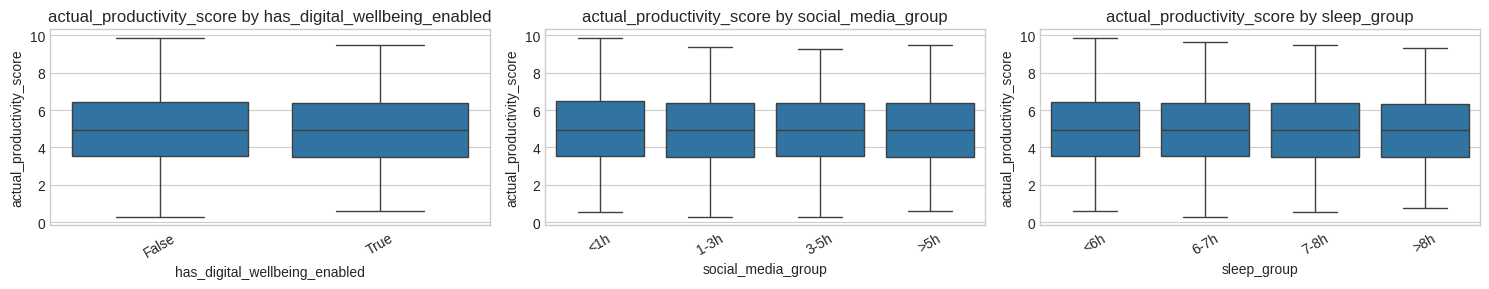

------


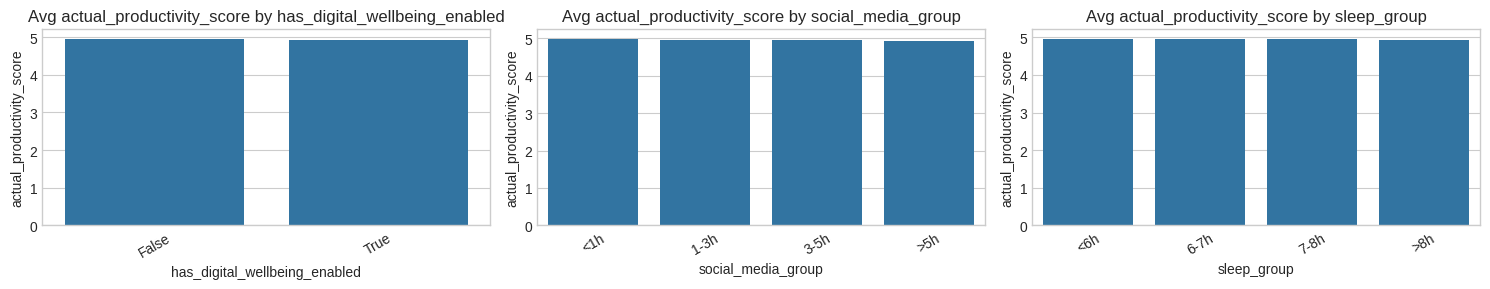

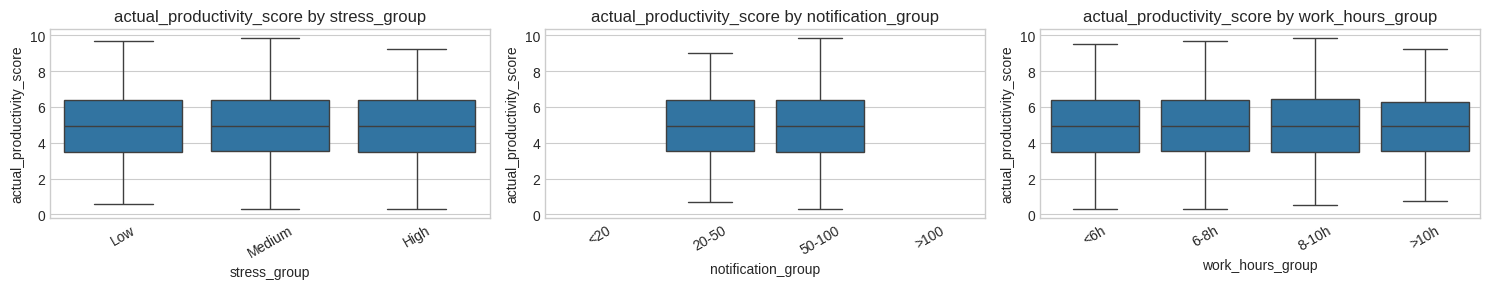

------


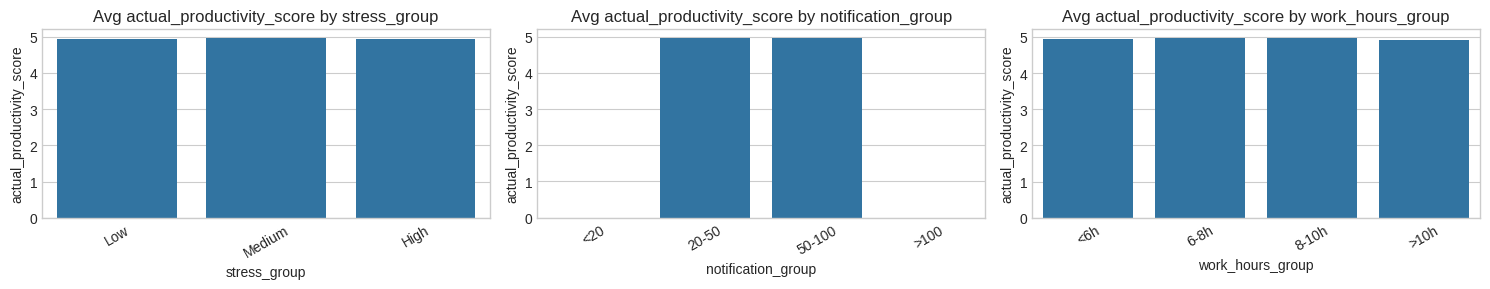

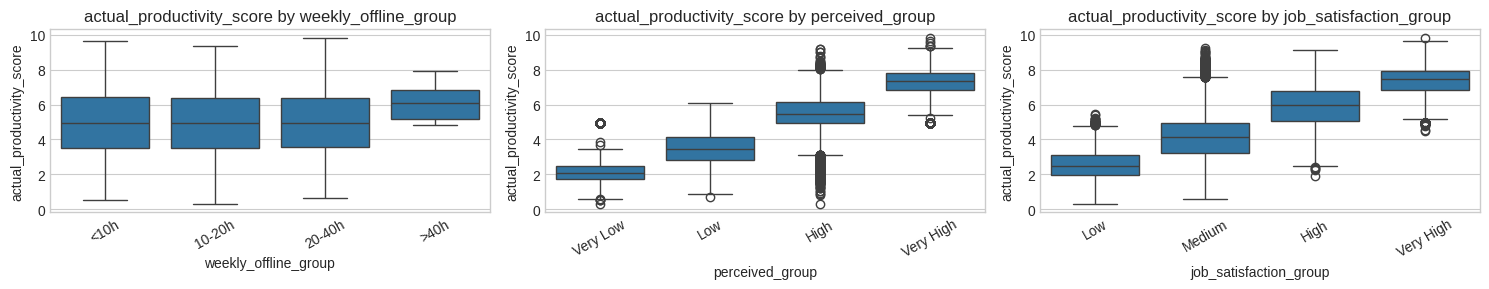

------


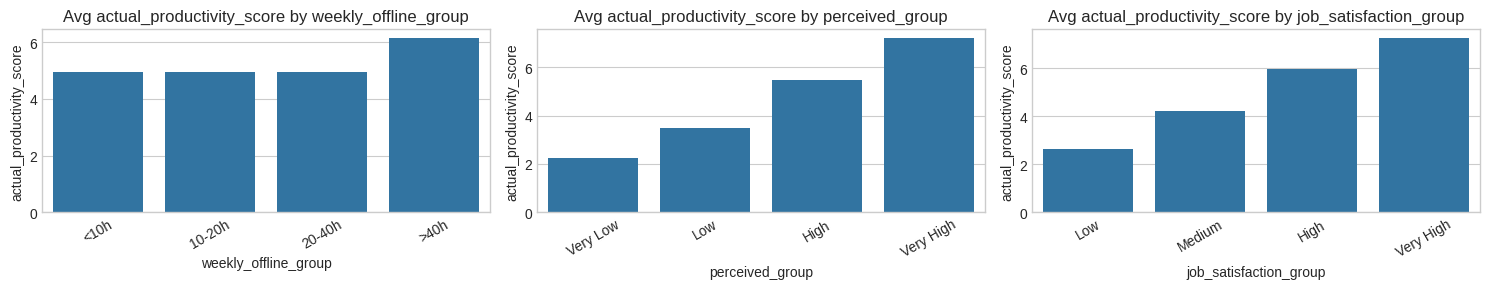

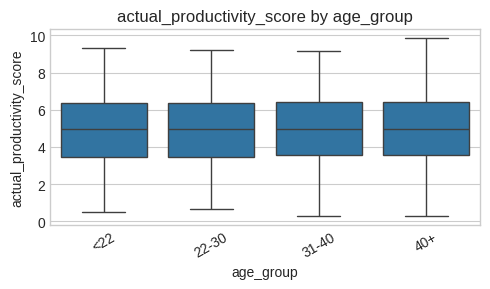

------


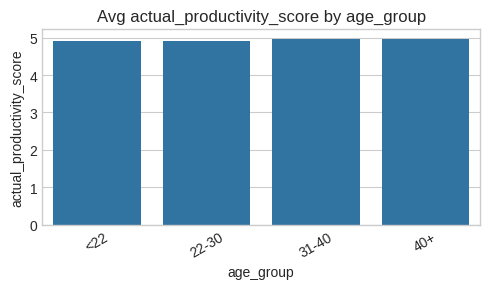

In [13]:
# --- BẮT ĐẦU PHẦN CODE TẠO NHÓM ĐƯỢC DI CHUYỂN ---

# Tạo các nhóm hành vi
df['social_media_group'] = pd.cut(
    df['daily_social_media_time'],
    bins=[-1, 1, 3, 5, 24],
    labels=['<1h', '1-3h', '3-5h', '>5h']
)
df['sleep_group'] = pd.cut(
    df['sleep_hours'],
    bins=[0, 6, 7, 8, 24],
    labels=['<6h', '6-7h', '7-8h', '>8h']
)
df['stress_group'] = pd.cut(
    df['stress_level'],
    bins=[-1, 3, 7, 10],
    labels=['Low', 'Medium', 'High']
)
# Tạo các nhóm cho number_of_notifications
notification_bins = [-1, 20, 50, 100, df['number_of_notifications'].max()]
if notification_bins[-1] <= notification_bins[-2]:
    notification_bins[-1] = notification_bins[-2] + 1e-9 \

df['notification_group'] = pd.cut(
    df['number_of_notifications'],
    bins=notification_bins,
    labels=['<20', '20-50', '50-100', '>100'],
    right=True # Use right=True to include the right edge of the bin
)


df['work_hours_group'] = pd.cut(
    df['work_hours_per_day'],
    bins=[0, 6, 8, 10, 24],
    labels=['<6h', '6-8h', '8-10h', '>10h']
)
df['weekly_offline_group'] = pd.cut(
    df['weekly_offline_hours'],
    bins=[-1, 10, 20, 40, 168],
    labels=['<10h', '10-20h', '20-40h', '>40h']
)

# Từ 0 đến 10, chia thành 4 nhóm: 'Low', 'Medium', 'High', 'Very High'

df['perceived_group'] = pd.cut(
    df['perceived_productivity_score'],
    bins=[0, 2.5, 5, 7.5, 10],
    labels=['Very Low', 'Low', 'High', 'Very High']
)

# Từ 0 đến 10, chia thành 4 nhóm: 'Low', 'Medium', 'High', 'Very High'
df['job_satisfaction_group'] = pd.cut(
    df['job_satisfaction_score'],
    bins=[0, 2.5, 5, 7.5, 10],
    labels=['Low', 'Medium', 'High', 'Very High'],
    include_lowest=True
)


# Nếu có age thì tạo group tuổi
if 'age' in df.columns: # Use df here
    df['age_group'] = pd.cut(
        df['age'],
        bins=[0, 22, 30, 40, 100],
        labels=['<22', '22-30', '31-40', '40+']
    )

# --- KẾT THÚC PHẦN CODE TẠO NHÓM ĐƯỢC DI CHUYỂN ---


# 1. Phân tích phân phối từng nhóm của các cột phân loại
n_cols = 3  # Số biểu đồ trên mỗi hàng
plt.style.use('seaborn-v0_8-whitegrid')

for i in range(0, len(categorical_cols), n_cols):
    sub_cols = categorical_cols[i:i + n_cols]
    fig, axes = plt.subplots(1, len(sub_cols), figsize=(5 * len(sub_cols), 3))
    if len(sub_cols) == 1:
        axes = [axes]  # Đảm bảo axes là list kể cả chỉ có 1 biểu đồ

    for ax, col in zip(axes, sub_cols):
        if col in df.columns:
            sns.countplot(x=col, data=df, ax=ax)
            ax.set_title(f"{col} distribution")
            ax.tick_params(axis='x', rotation=30)
    plt.tight_layout()
    plt.show(

    )
print("------")

# 2. So sánh target giữa các nhóm (boxplot & bar chart)
for i in range(0, len(categorical_cols), n_cols):
    sub_cols = categorical_cols[i:i + n_cols]
    fig, axes = plt.subplots(1, len(sub_cols), figsize=(5 * len(sub_cols), 3))
    if len(sub_cols) == 1:
        axes = [axes]
    for ax, col in zip(axes, sub_cols):
        if col in df.columns:
            sns.boxplot(x=col, y=target_col, data=df, ax=ax)
            ax.set_title(f"{target_col} by {col}")
            ax.tick_params(axis='x', rotation=30)
    plt.tight_layout()
    plt.show()

    print("------")

    # Bar chart: trung bình target theo nhóm
    fig, axes = plt.subplots(1, len(sub_cols), figsize=(5 * len(sub_cols), 3))
    if len(sub_cols) == 1:
        axes = [axes]
    for ax, col in zip(axes, sub_cols):
        if col in df.columns:
            group_means = df.groupby(col, observed=False)[target_col].mean().reset_index()
            sns.barplot(x=col, y=target_col, data=group_means, ax=ax)
            ax.set_title(f"Avg {target_col} by {col}")
            ax.tick_params(axis='x', rotation=30)
    plt.tight_layout()
    plt.show()

1. Phân phối các nhóm (Distribution of Categories)

- Các biến định tính (categorical columns):

  Giới tính: Nam và nữ phân bố gần như đều, nhóm "Other" rất ít.

  Loại công việc: Các nhóm nghề nghiệp khá đồng đều, không có nhóm nào chiếm áp đảo tuyệt đối.

  Ứng dụng tập trung (focus apps): Phần lớn không sử dụng, chỉ khoảng 1/3 sử dụng.

  Cài đặt wellbeing: Đa số không bật Digital Wellbeing.

  Nhóm thời gian dùng MXH: Phần đông nằm ở mức 1–5h/ngày, rất ít dùng >5h/ngày hoặc <1h/ngày.

  Nhóm giấc ngủ: Chủ yếu ngủ <7h, nhóm ngủ nhiều (>8h) ít.

  Stress level: Nhóm Medium nhiều nhất, Low và High gần như cân bằng.

  Thông báo (notification): Tập trung chủ yếu ở nhóm 50–100 thông báo/ngày, số nhận >100 rất ít.

  Thời gian làm việc/ngày: Phần lớn làm 6–8h/ngày, nhóm làm >10h/ngày rất ít.

  Thời gian offline/tuần: Chủ yếu <20h/tuần.

  Perceived productivity & Job satisfaction: Nhiều nhất ở mức High/Medium, ít trường hợp Very Low/Very High.

  Age group: Tập trung nhiều ở nhóm 40+, các nhóm trẻ ít hơn.

- Nhận định nhanh:
Phân phối khá đều ở nhiều trường, riêng các hành vi cực đoan (ngủ nhiều, làm quá nhiều, nhận thông báo quá nhiều, dùng MXH quá nhiều…) đều ít. Dataset phản ánh khá sát một lực lượng lao động trẻ, điển hình, không có nhiều outlier lớn về hành vi.

2. So sánh actual_productivity_score giữa các nhóm:
- Nhận định tổng quan:
  
  Hầu hết các nhóm hành vi (dùng MXH, ngủ, stress, thông báo, work hours, offline hours, tuổi, nghề, giới…) đều có điểm năng suất trung bình dao động rất thấp quanh mốc ~5.

  Không nhóm nào thực sự vượt trội hoặc thực sự thấp kém về điểm năng suất trung bình.

  Perceived productivity score và Job satisfaction score là hai biến duy nhất phân biệt rõ ràng các nhóm về điểm năng suất (càng high/very high thì actual productivity tăng mạnh).

# 4. Modeling

In [11]:
!pip install -U scikit-learn

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np # Import numpy for sqrt

# Select features and target variable
features = [
    'perceived_productivity_score',
    'job_satisfaction_score',
    'sleep_hours',
    'daily_social_media_time'
]
target = 'actual_productivity_score'


# Define X and y
X = df[features]
y = df[target]

# Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred) # Calculate MSE
rmse = np.sqrt(mse) # Take the square root to get RMSE
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.2f}")

RMSE: 0.72
R²: 0.84


MAE: 0.52


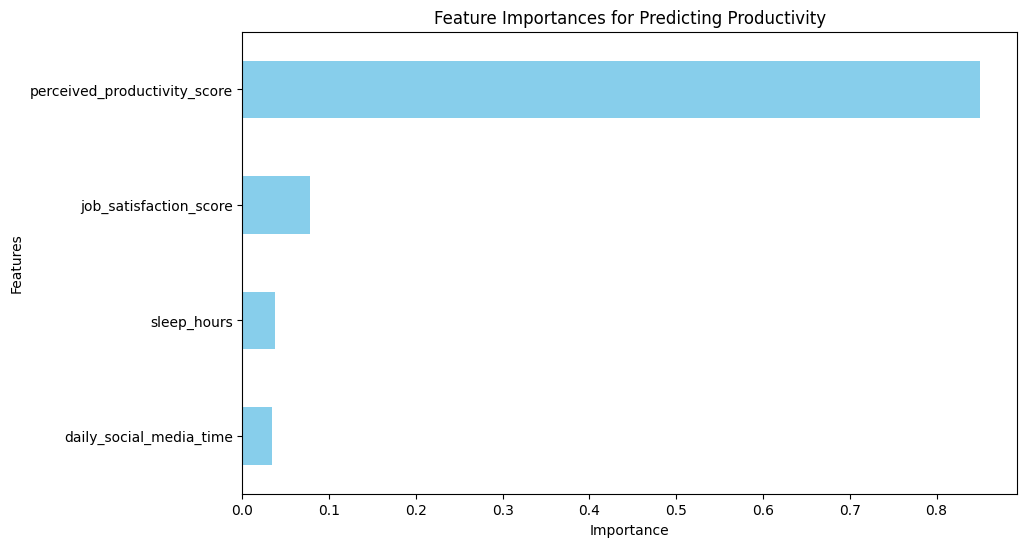

------


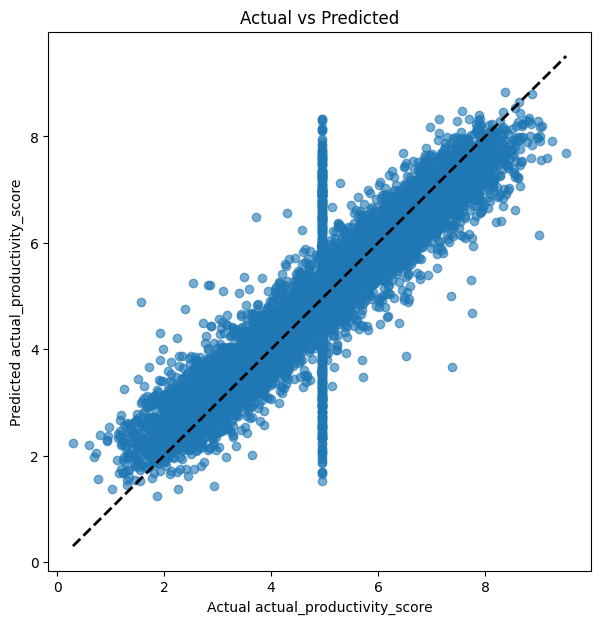

In [17]:
# Tính MAE
from sklearn.metrics import mean_absolute_error # Import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
print(f"MAE: {mae:.2f}")

# Get feature importance
importances = model.feature_importances_
feature_names = X.columns

# Create a Series and sort
feat_df = pd.Series(importances, index=feature_names).sort_values(ascending=False)

# Plot
plt.figure(figsize=(10,6))
feat_df.plot(kind='barh', color='skyblue')
plt.title('Feature Importances for Predicting Productivity')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.gca().invert_yaxis()
plt.show()

print("------")

# Vẽ biểu đồ Actual vs Predicted
plt.figure(figsize=(7,7))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual actual_productivity_score')
plt.ylabel('Predicted actual_productivity_score')
plt.title('Actual vs Predicted')
plt.show()

In [13]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20]
}

grid_search = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=param_grid,
    cv=3,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)

print("Best parameters found:", grid_search.best_params_)

best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)

rmse_best = np.sqrt(mean_squared_error(y_test, y_pred_best))
r2_best = r2_score(y_test, y_pred_best)

print(f"Optimized Model RMSE: {rmse_best:.2f}")
print(f"Optimized Model R²: {r2_best:.2f}")


Fitting 3 folds for each of 6 candidates, totalling 18 fits
Best parameters found: {'max_depth': 10, 'n_estimators': 200}
Optimized Model RMSE: 0.70
Optimized Model R²: 0.85


# 5. Dataset for visualization

In [26]:
# Dự đoán cho toàn bộ dữ liệu (không chỉ X_test)
y_pred_full = model.predict(df[features])

# Tạo bản sao dataframe đầy đủ để xuất
df_export = df.copy()

# Thêm cột dự đoán và sai số dự đoán
df_export['predicted_productivity_score'] = y_pred_full
df_export['prediction_error'] = abs(df_export['actual_productivity_score'] - df_export['predicted_productivity_score'])

# Reset index để có row_id cho scatter/drill-down
df_export = df_export.reset_index(drop=True)
df_export['row_id'] = df_export.index + 1

# Tạo các nhóm hành vi
df_export['social_media_group'] = pd.cut(
    df_export['daily_social_media_time'],
    bins=[-1, 1, 3, 5, 24],
    labels=['<1h', '1-3h', '3-5h', '>5h']
)
df_export['sleep_group'] = pd.cut(
    df_export['sleep_hours'],
    bins=[0, 6, 7, 8, 24],
    labels=['<6h', '6-7h', '7-8h', '>8h']
)
df_export['stress_level_group'] = pd.cut(
    df_export['stress_level'],
    bins=[-1, 3, 7, 10],
    labels=['Low', 'Medium', 'High']
)
# Tạo các nhóm cho number_of_notifications
# Ensure the bins are strictly increasing
notification_bins = [-1, 20, 50, 100, df_export['number_of_notifications'].max()]
# Add a small epsilon to the last bin if it's equal to the one before it
if notification_bins[-1] <= notification_bins[-2]:
    notification_bins[-1] = notification_bins[-2] + 1e-9 # Add a very small number

df_export['notification_group'] = pd.cut(
    df_export['number_of_notifications'],
    bins=notification_bins, # Use the adjusted bins
    labels=['<20', '20-50', '50-100', '>100'],
    right=True # Use right=True to include the right edge of the bin
)


df_export['work_hours_group'] = pd.cut(
    df_export['work_hours_per_day'],
    bins=[0, 6, 8, 10, 24],
    labels=['<6h', '6-8h', '8-10h', '>10h']
)
df_export['weekly_offline_group'] = pd.cut(
    df_export['weekly_offline_hours'],
    bins=[-1, 10, 20, 40, 168],
    labels=['<10h', '10-20h', '20-40h', '>40h']
)

# Từ 0 đến 10, chia thành 4 nhóm: 'Low', 'Medium', 'High', 'Very High'

df_export['perceived_group'] = pd.cut(
    df_export['perceived_productivity_score'],
    bins=[0, 2.5, 5, 7.5, 10],
    labels=['Very Low', 'Low', 'High', 'Very High']
)

# Từ 0 đến 10, chia thành 4 nhóm: 'Low', 'Medium', 'High', 'Very High'
df_export['job_satisfaction_group'] = pd.cut(
    df_export['job_satisfaction_score'],
    bins=[0, 2.5, 5, 7.5, 10],
    labels=['Low', 'Medium', 'High', 'Very High'],
    include_lowest=True
)


# Nếu có age thì tạo group tuổi
if 'age' in df_export.columns:
    df_export['age_group'] = pd.cut(
        df_export['age'],
        bins=[0, 22, 30, 40, 100],
        labels=['<22', '22-30', '31-40', '40+']
    )

# Xuất file đầy đủ cho Looker Studio
output_path = 'lookerstudio_dataset_full.csv'
df_export.to_csv(output_path, index=False)
print(f"Dữ liệu FULL đã được xuất ra file: {output_path}")

Dữ liệu FULL đã được xuất ra file: lookerstudio_dataset_full.csv
